In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Read Data

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("/content/drive/MyDrive/weather_classification_data.csv")
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [16]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [17]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


# EDA

In [24]:
# Nominal
df["Cloud Cover"]

,Cloud Cover
0,partly cloudy
1,partly cloudy
2,clear
3,clear
4,overcast
...,...
13195,overcast
13196,cloudy
13197,overcast
13198,overcast


In [19]:
df["Cloud Cover"].value_counts()

,count
Cloud Cover,
overcast,6090
partly cloudy,4560
clear,2139
cloudy,411


In [31]:
from sklearn.preprocessing import LabelEncoder

le_cloud = LabelEncoder()
df['Cloud Cover'] = le_cloud.fit_transform(df['Cloud Cover'])    # clear': 0,'cloudy': 1,'overcast': 2,'partly cloudy': 3

df["Cloud Cover"]

,Cloud Cover
0,3
1,3
2,0
3,0
4,2
...,...
13195,2
13196,1
13197,2
13198,2


In [28]:
df["Season"]

,Season
0,Winter
1,Spring
2,Spring
3,Spring
4,Winter
...,...
13195,Summer
13196,Winter
13197,Autumn
13198,Winter


In [21]:
df["Season"].value_counts()

,count
Season,
Winter,5610
Spring,2598
Autumn,2500
Summer,2492


In [30]:
le_season = LabelEncoder()
df['Season'] = le_season.fit_transform(df['Season'])     # 'Autumn': 0,'Spring': 1,'Summer': 2,'Winter': 3

df["Season"]

,Season
0,3
1,1
2,1
3,1
4,3
...,...
13195,2
13196,3
13197,0
13198,3


In [32]:
df["Location"]

,Location
0,inland
1,inland
2,mountain
3,coastal
4,mountain
...,...
13195,mountain
13196,coastal
13197,coastal
13198,inland


In [22]:
df["Location"].value_counts()

,count
Location,
inland,4816
mountain,4813
coastal,3571


In [33]:
le_location = LabelEncoder()
df['Location'] = le_location.fit_transform(df['Location'])   # 'coastal': 0,'inland': 1,'mountain': 2

df["Location"]

,Location
0,1
1,1
2,2
3,0
4,2
...,...
13195,2
13196,0
13197,0
13198,1


In [34]:
df["Weather Type"]

,Weather Type
0,Rainy
1,Cloudy
2,Sunny
3,Sunny
4,Rainy
...,...
13195,Rainy
13196,Snowy
13197,Cloudy
13198,Snowy


In [23]:
# Target Balanced
df["Weather Type"].value_counts()

,count
Weather Type,
Rainy,3300
Cloudy,3300
Sunny,3300
Snowy,3300


In [35]:
le_target = LabelEncoder()
df['Weather Type'] = le_target.fit_transform(df['Weather Type'])    # 'Cloudy': 0, 'Rainy': 1, 'Snowy': 2, 'Sunny': 3

df["Weather Type"]

,Weather Type
0,1
1,0
2,3
3,3
4,1
...,...
13195,1
13196,2
13197,0
13198,2


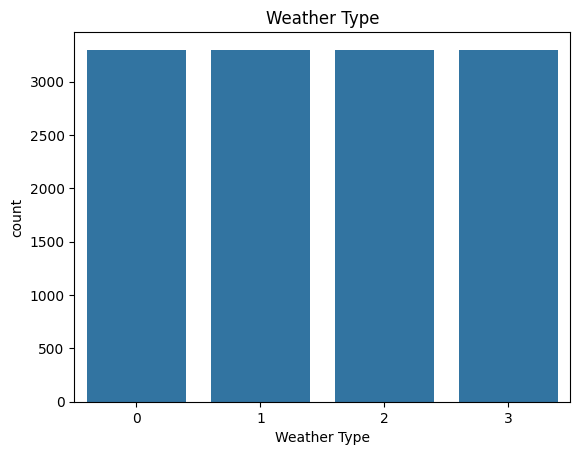

In [71]:
sns.countplot(x=df['Weather Type'])
plt.title('Weather Type');

In [36]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,2,1003.15,1,2,1.0,2,1
13196,-1.0,76,3.5,23.0,1,1067.23,1,3,6.0,0,2
13197,30.0,77,5.5,28.0,2,1012.69,3,0,9.0,0,0
13198,3.0,76,10.0,94.0,2,984.27,0,3,2.0,1,2


In [40]:
n_df = df[["Temperature", "Humidity", "Wind Speed" , "Precipitation (%)" , "Atmospheric Pressure" , "UV Index" , "Visibility (km)"]]
n_df

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
0,14.0,73,9.5,82.0,1010.82,2,3.5
1,39.0,96,8.5,71.0,1011.43,7,10.0
2,30.0,64,7.0,16.0,1018.72,5,5.5
3,38.0,83,1.5,82.0,1026.25,7,1.0
4,27.0,74,17.0,66.0,990.67,1,2.5
...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,1003.15,1,1.0
13196,-1.0,76,3.5,23.0,1067.23,1,6.0
13197,30.0,77,5.5,28.0,1012.69,3,9.0
13198,3.0,76,10.0,94.0,984.27,0,2.0


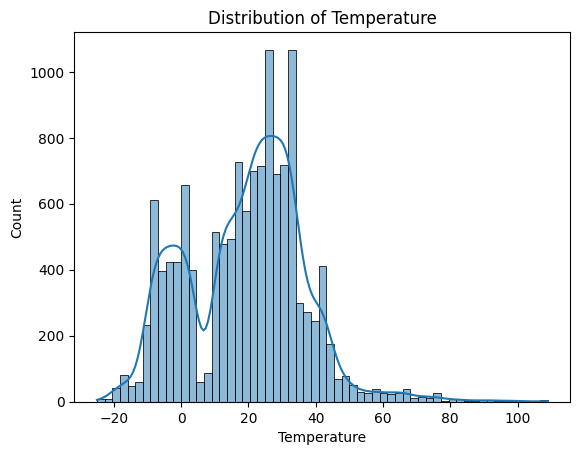

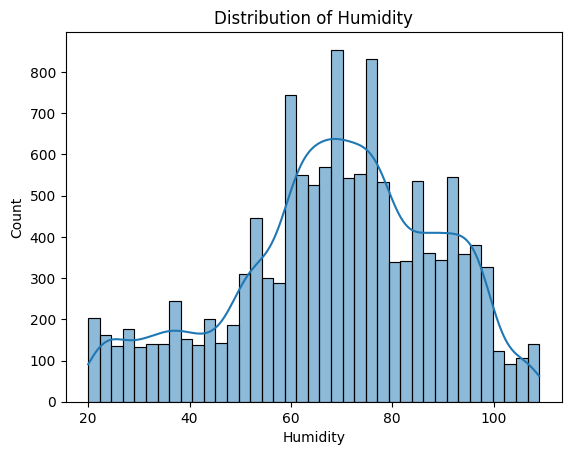

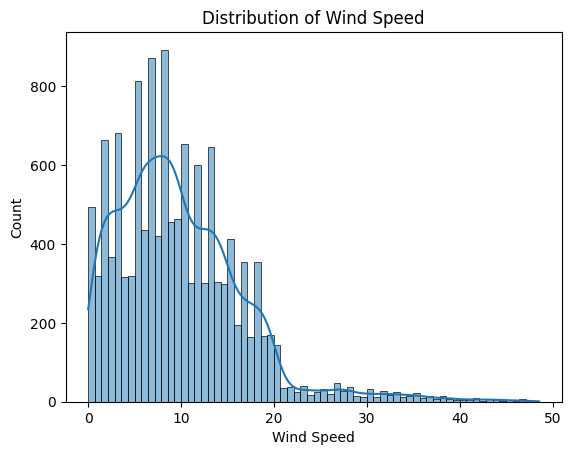

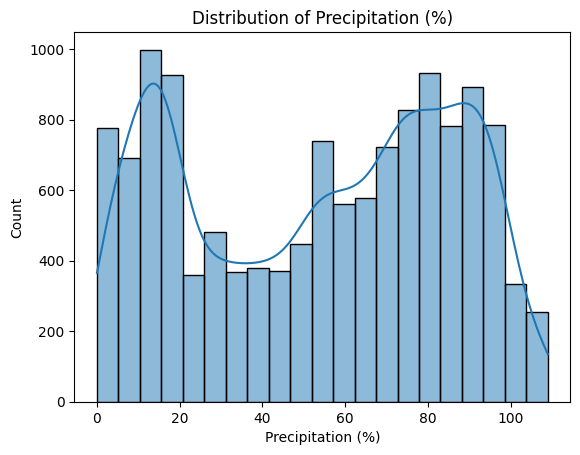

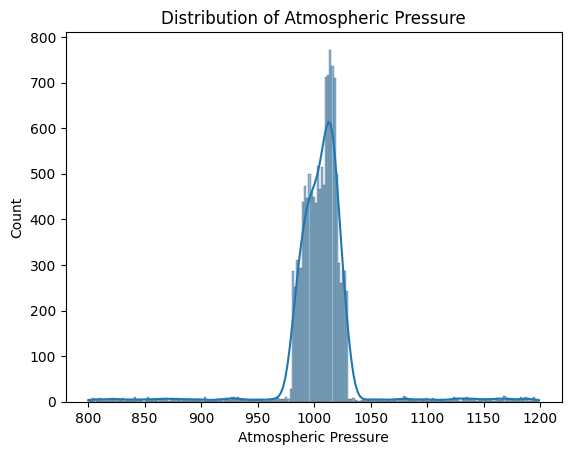

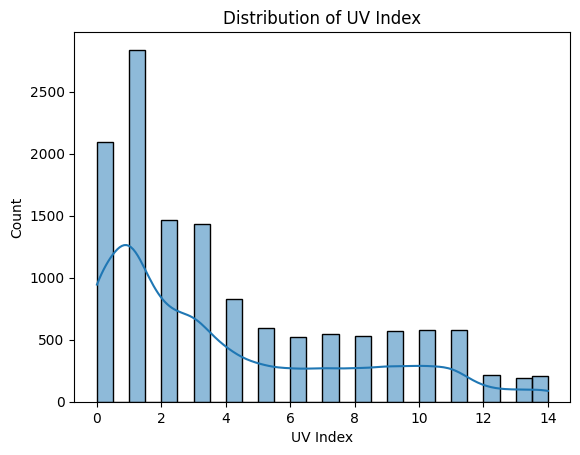

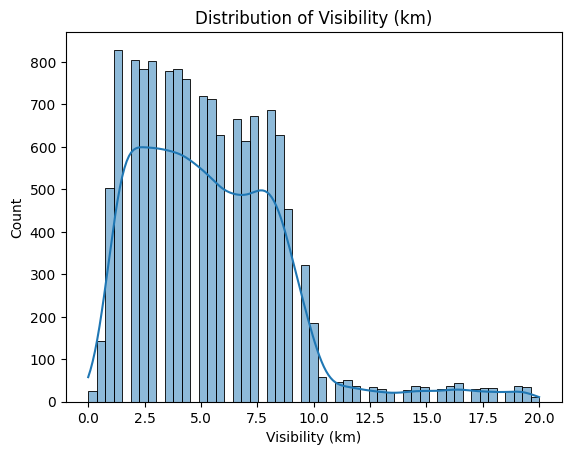

In [44]:
import os

# Create folder to save histograms
os.makedirs("histograms", exist_ok=True)

# Loop through each column and display + save histogram
for col in n_df.columns:
    sns.histplot(n_df[col], kde=True)
    plt.title(f"Distribution of {col}")

    plt.show()  # Display the plot on screen
    plt.savefig(f"histograms/{col}_histogram.png")  # Save figure
    plt.close()  # Close plot

In [54]:
# Calculate skewness for each column in n_df
for col in n_df.columns:
    print(col, "skewness:", n_df[col].skew())

Temperature skewness: 0.2217414467117672
Humidity skewness: -0.40161426558981855
Wind Speed skewness: 1.3602625756285232
Precipitation (%) skewness: -0.15245706717664612
Atmospheric Pressure skewness: -0.2938986063675234
UV Index skewness: 0.9000101823909895
Visibility (km) skewness: 1.2332751645049822


In [56]:
# Z-score
cols_zscore = df[["Temperature","Humidity","Atmospheric Pressure","Precipitation (%)"]]
cols_zscore

,Temperature,Humidity,Atmospheric Pressure,Precipitation (%)
0,14.0,73,1010.82,82.0
1,39.0,96,1011.43,71.0
2,30.0,64,1018.72,16.0
3,38.0,83,1026.25,82.0
4,27.0,74,990.67,66.0
...,...,...,...,...
13195,10.0,74,1003.15,71.0
13196,-1.0,76,1067.23,23.0
13197,30.0,77,1012.69,28.0
13198,3.0,76,984.27,94.0


Temperature - Number of outliers: 92


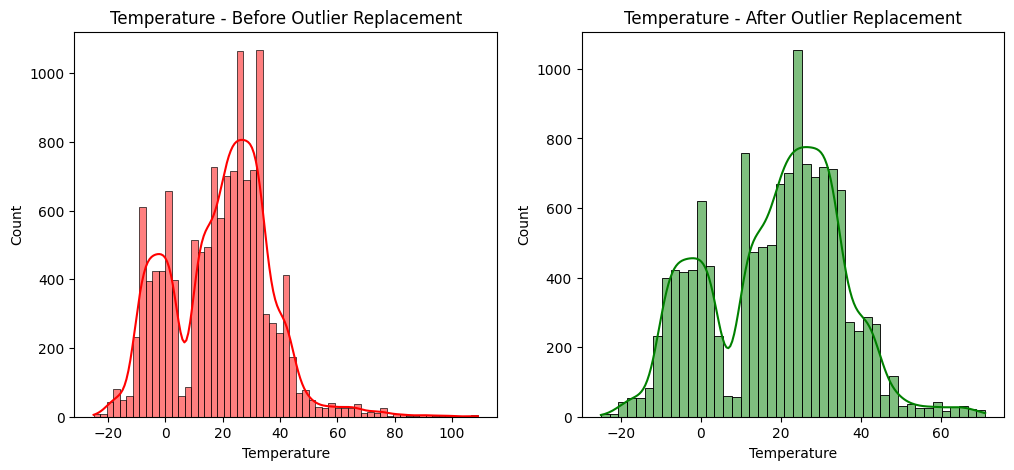

Humidity - Number of outliers: 0


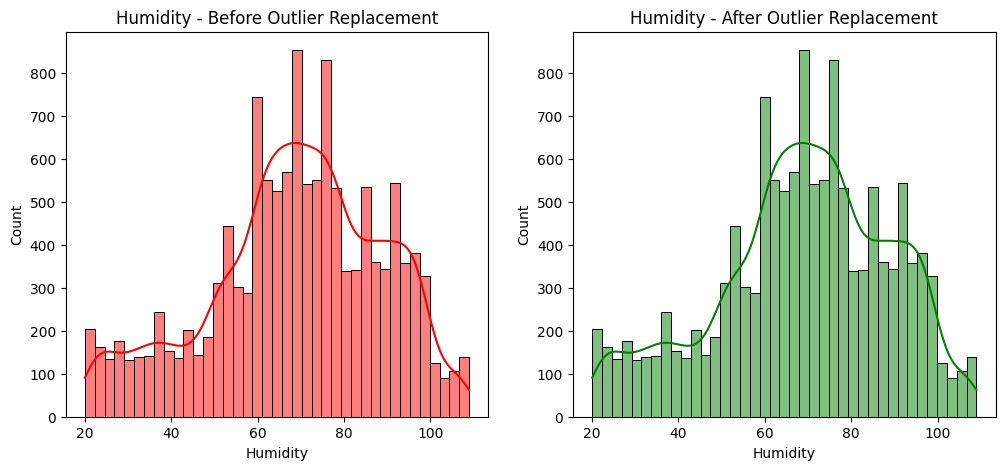

Atmospheric Pressure - Number of outliers: 556


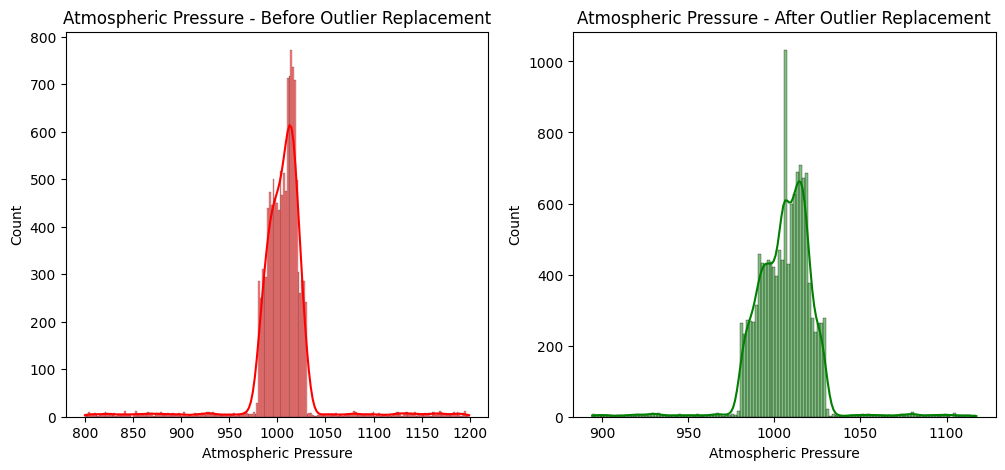

Precipitation (%) - Number of outliers: 0


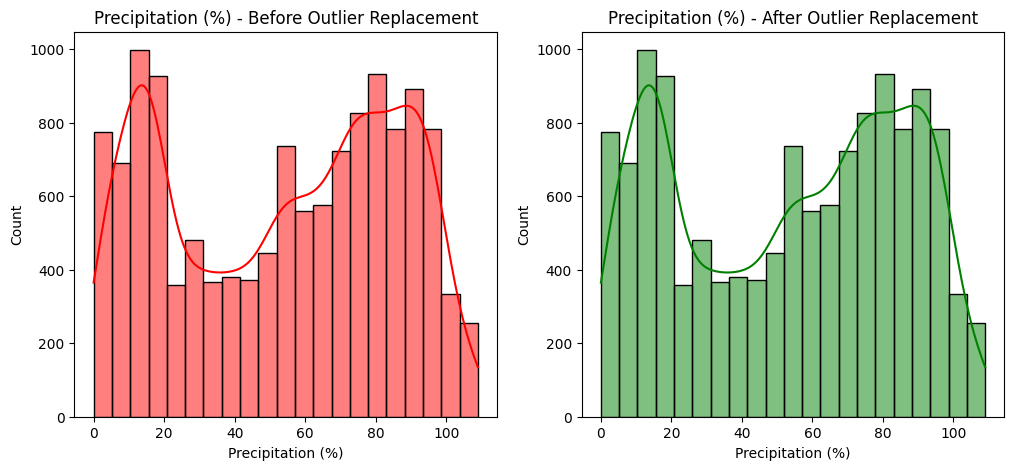

In [57]:
from scipy import stats
import os

# Create a copy of the data to modify
df_clean = df.copy()

# Create folder to save histograms
output_folder = "histograms_zscore"
os.makedirs(output_folder, exist_ok=True)

for col in cols_zscore:
    # Calculate Z-score
    z = stats.zscore(df_clean[col])

    # Identify outliers (|Z| > 3)
    outliers = (z < -3) | (z > 3)
    print(f"{col} - Number of outliers: {outliers.sum()}")

    # Replace outliers with the mean
    mean_val = df_clean[col].mean()
    df_clean[col] = df_clean[col].mask(outliers, mean_val)

    # Visual check: Before and After
    plt.figure(figsize=(12,5))

    # Before replacement
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, color='red')
    plt.title(f"{col} - Before Outlier Replacement")

    # After replacement
    plt.subplot(1,2,2)
    sns.histplot(df_clean[col], kde=True, color='green')
    plt.title(f"{col} - After Outlier Replacement")

    # Save the figure
    file_path = os.path.join(output_folder, f"{col}_outlier_replacement.png")
    plt.savefig(file_path)

    # Show the figure
    plt.show()

In [60]:
# IQR
cols_iqr = df[["Wind Speed","UV Index","Visibility (km)"]]
cols_iqr

,Wind Speed,UV Index,Visibility (km)
0,9.5,2,3.5
1,8.5,7,10.0
2,7.0,5,5.5
3,1.5,7,1.0
4,17.0,1,2.5
...,...,...,...
13195,14.5,1,1.0
13196,3.5,1,6.0
13197,5.5,3,9.0
13198,10.0,0,2.0


Wind Speed - Number of outliers: 404


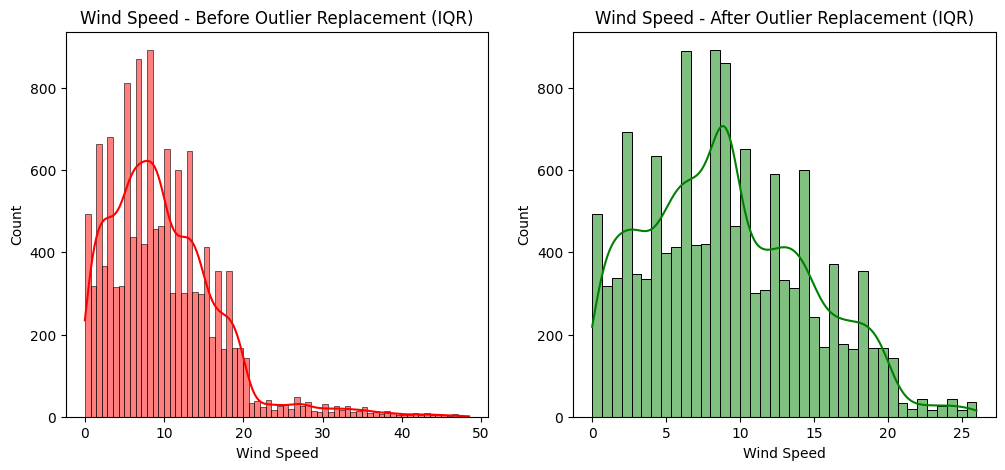

UV Index - Number of outliers: 0


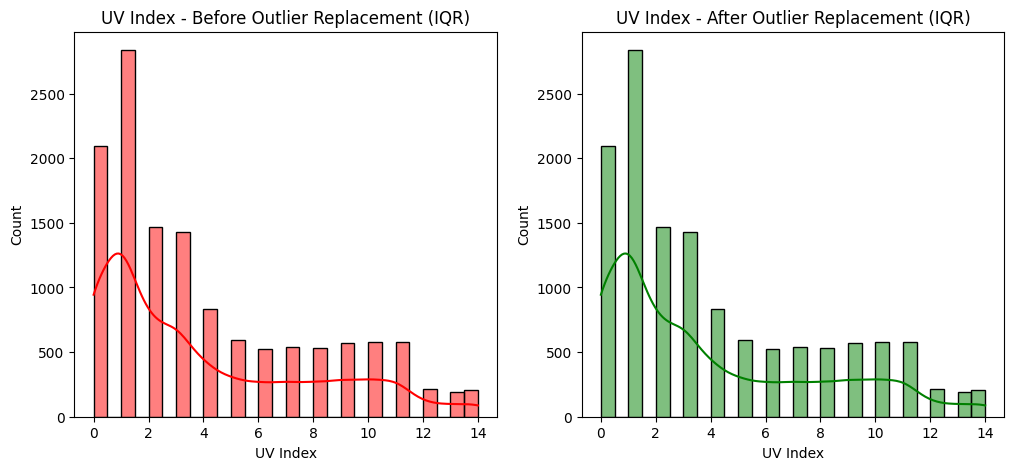

Visibility (km) - Number of outliers: 383


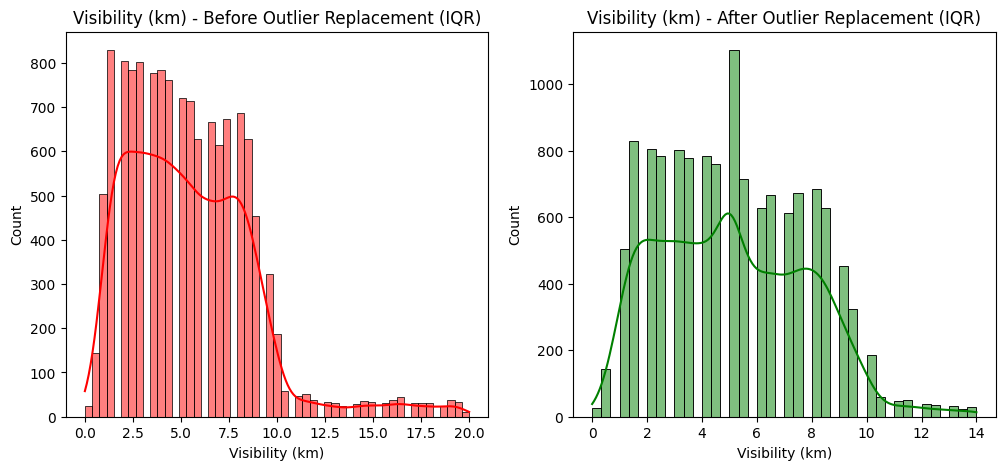

In [61]:
# Create a copy of the data to modify
df_iqr = df.copy()

# Create folder to save histograms
output_folder_iqr = "histograms_iqr"
os.makedirs(output_folder_iqr, exist_ok=True)

for col in cols_iqr:
    # Calculate Q1, Q3 and IQR
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers = (df_iqr[col] < (Q1 - 1.5*IQR)) | (df_iqr[col] > (Q3 + 1.5*IQR))
    print(f"{col} - Number of outliers: {outliers.sum()}")

    # Replace outliers with median
    median_val = df_iqr[col].median()
    df_iqr[col] = df_iqr[col].mask(outliers, median_val)

    # Visual check: Before and After
    plt.figure(figsize=(12,5))

    # Before replacement
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, color='red')
    plt.title(f"{col} - Before Outlier Replacement (IQR)")

    # After replacement
    plt.subplot(1,2,2)
    sns.histplot(df_iqr[col], kde=True, color='green')
    plt.title(f"{col} - After Outlier Replacement (IQR)")

    # Save the figure
    file_path = os.path.join(output_folder_iqr, f"{col}_outlier_replacement_iqr.png")
    plt.savefig(file_path)

    # Show the figure
    plt.show()

In [69]:
df_clean

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,2,1003.15,1,2,1.0,2,1
13196,-1.0,76,3.5,23.0,1,1067.23,1,3,6.0,0,2
13197,30.0,77,5.5,28.0,2,1012.69,3,0,9.0,0,0
13198,3.0,76,10.0,94.0,2,984.27,0,3,2.0,1,2


# Feature Engineering

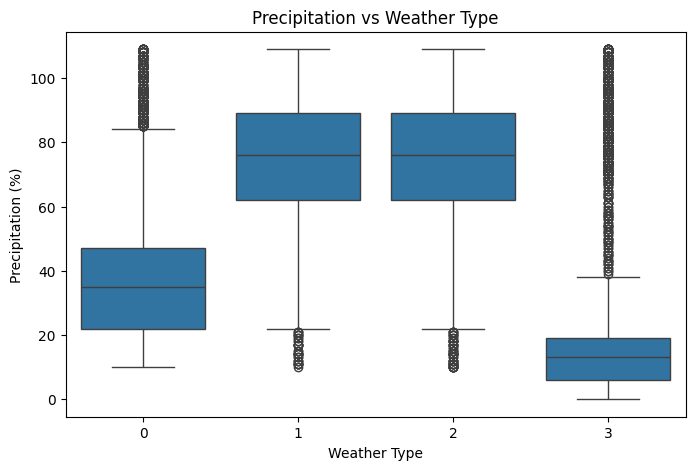

In [73]:
#-----Feature Engineering-----

plt.figure(figsize=(8,5))
sns.boxplot(x='Weather Type', y='Precipitation (%)', data=df_clean)       # 'Cloudy': 0, 'Rainy': 1, 'Snowy': 2, 'Sunny': 3
plt.title('Precipitation vs Weather Type')
plt.show()

In [74]:
# Create Precipitation category feature
df_clean['Precipitation_cat'] = pd.cut(df_clean['Precipitation (%)'],         # 0 → Light (0–30%) , 1 → Medium (31–70%) , 2 → Heavy (71–110%)
                                       bins=[-1, 30, 70, 110],
                                       labels=[0, 1, 2])

# Check how many samples in each category
print(df_clean['Precipitation_cat'].value_counts())

Precipitation_cat
2    5149
0    4145
1    3906
Name: count, dtype: int64


In [75]:
df_clean

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Precipitation_cat
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1,2
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0,2
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3,0
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3,2
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,2,1003.15,1,2,1.0,2,1,2
13196,-1.0,76,3.5,23.0,1,1067.23,1,3,6.0,0,2,0
13197,30.0,77,5.5,28.0,2,1012.69,3,0,9.0,0,0,0
13198,3.0,76,10.0,94.0,2,984.27,0,3,2.0,1,2,2


# Feature Selection

Feature Importance based on Mutual Information:

                 Feature  Mutual_Info
5   Atmospheric Pressure     0.651204
3      Precipitation (%)     0.525697
0            Temperature     0.519882
8        Visibility (km)     0.438550
6               UV Index     0.436094
4            Cloud Cover     0.371813
10     Precipitation_cat     0.299112
1               Humidity     0.273693
7                 Season     0.194698
2             Wind Speed     0.162228
9               Location     0.055408

Selected features based on MI threshold:
['Atmospheric Pressure', 'Precipitation (%)', 'Temperature', 'Visibility (km)', 'UV Index', 'Cloud Cover']


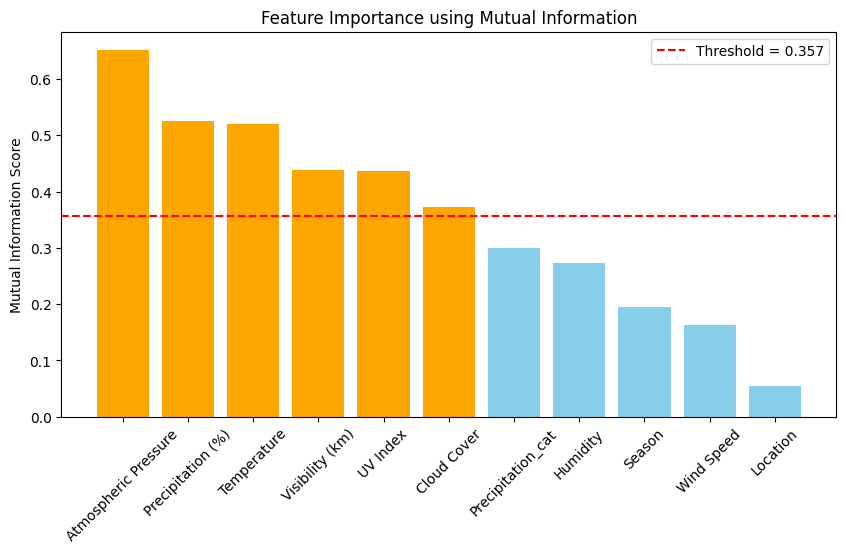

In [76]:
#-----Feature Selection-----
#--Filter Methods--
#-Mutual Information-

from sklearn.feature_selection import mutual_info_classif

# X = all features except the target
X = df_clean.drop('Weather Type', axis=1)
y = df_clean['Weather Type']

# Apply Mutual Information
mi = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Create DataFrame of features and their MI score
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Info': mi}).sort_values(by='Mutual_Info', ascending=False)
print("Feature Importance based on Mutual Information:\n")
print(mi_df)

# Determine threshold (mean MI)
threshold = mi_df['Mutual_Info'].mean()
selected_features = mi_df[mi_df['Mutual_Info'] > threshold]['Feature'].tolist()
print("\nSelected features based on MI threshold:")
print(selected_features)

# Visualize the MI scores with threshold line
plt.figure(figsize=(10,5))
bars = plt.bar(mi_df['Feature'], mi_df['Mutual_Info'], color=['skyblue' if score <= threshold else 'orange' for score in mi_df['Mutual_Info']])
plt.xticks(rotation=45)
plt.ylabel('Mutual Information Score')
plt.title('Feature Importance using Mutual Information')

# Add horizontal line for threshold
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold = {threshold:.3f}')
plt.legend()
plt.show()


#**Selected features**
based on MI threshold:

['Atmospheric Pressure', 'Precipitation (%)', 'Temperature', 'Visibility (km)', 'UV Index', 'Cloud Cover']

In [77]:
# Save cleaned DataFrame to CSV
# df_clean.to_csv("df_clean.csv", index=False)
# print("df_clean saved as CSV successfully!")

df_clean saved as CSV successfully!
